Project on Heart Disease by Justin Dinkelbach, Timothy Hinea, Brandon Lee, and David Sullivan


---

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz as graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

#import data
header_list = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names=header_list)
sns.set()
sns.set_context('paper') 

---
# Data Exploration

* There are 303 entries in the dataset.
* There is no NA/bad data because this data has already been pre-processed.



In [ ]:
header_list = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names=header_list)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


---
# Prepocessing and Cleaning




In [ ]:
# Remove useless/irrelevant columns
df.drop(['ca', 'thal'], axis=1, inplace=True)

# define variable heart_disease that will be our target
df['heart_disease'] = (df['num'] > 0).astype(int)

---
# Data Visualizaiton

* histograms of single numeric variables
* bar plots of value counts of single categorical variables
* grid of scatter plots (numeric variables)
* violin/bar plots for categorical/numeric variable pairs
* three-variable plots, such as scatterplots with color or shape of points as a * third variable, or grouped bar plots
* plots of data over time (if applicable)


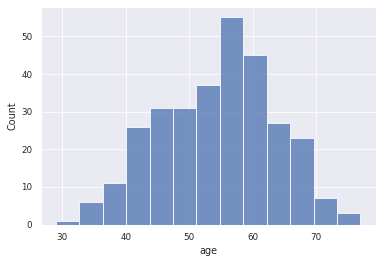

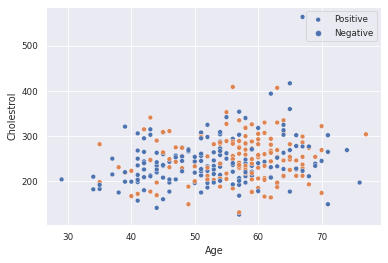

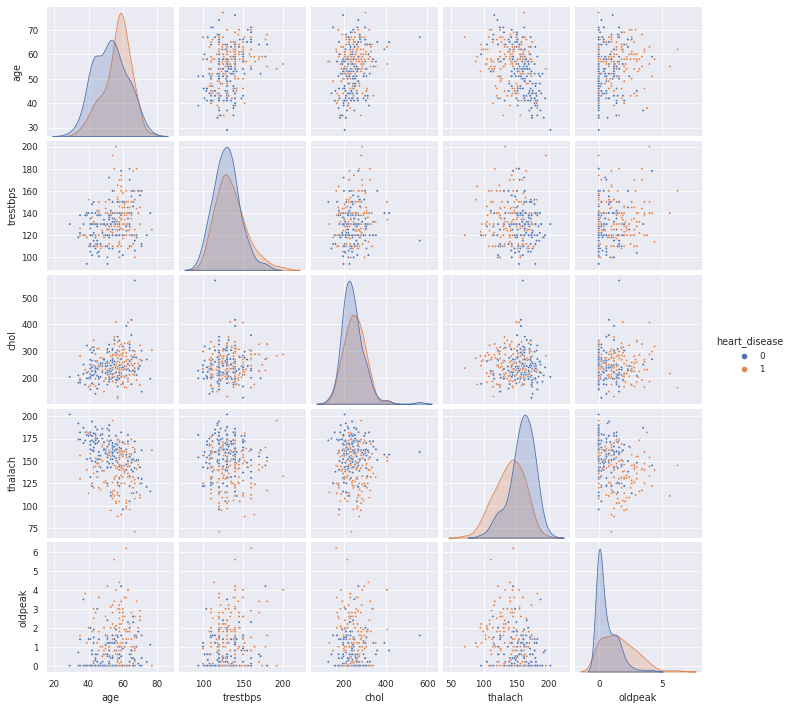

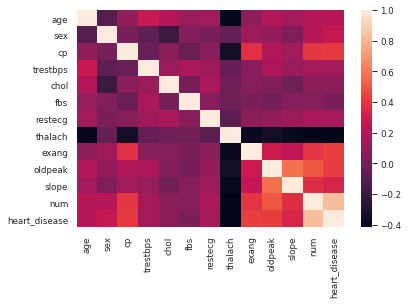

In [ ]:
# Scatter plot
sns.histplot(df['age'])
plt.show()
sns.scatterplot(x='age', y='chol', data=df, hue='heart_disease')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.legend(labels=['Positive', 'Negative'])

# Pair plot
sns.pairplot(df, vars=['age','trestbps', 'chol', 'thalach', 'oldpeak'], markers='.', height=2, hue='heart_disease')
plt.show()
sns.heatmap(df.corr())

---
# Final processing and cleaning

* convert categorical to numeric data?
* scale data if needed?


---
# Machine Learning


---
#Decision Tree Classifier for data


0.7122641509433962


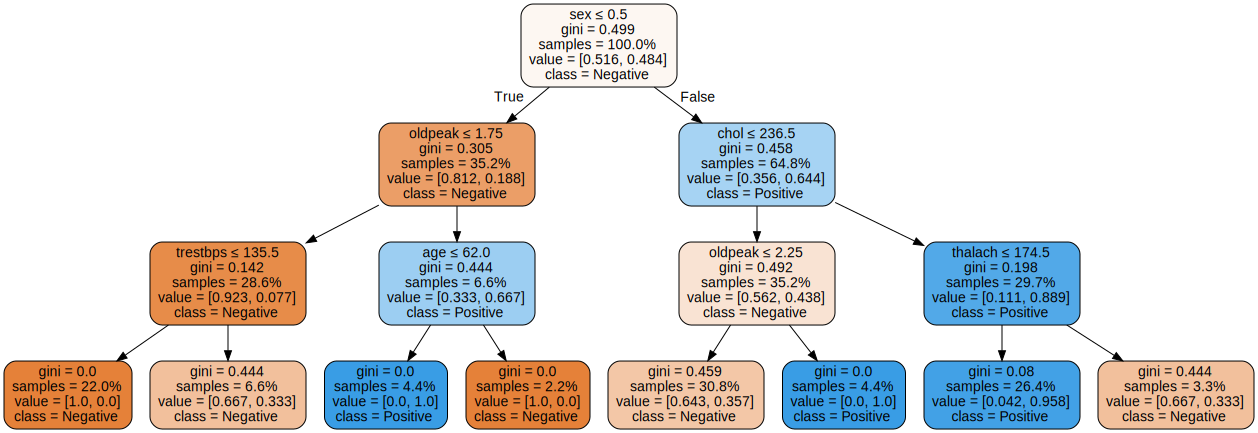

In [ ]:
# This is decision tree
predictors = ['age','trestbps', 'chol', 'thalach', 'oldpeak','sex', 'exang', 'slope']
X = df[predictors].values
y = df['heart_disease'].values
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=0)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

target_names = ['Negative', 'Positive']
dot_data = export_graphviz(clf, precision=3, feature_names=predictors, proportion=True, class_names=target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

---
# KNN Prediction for data


In [ ]:
predictors = ['age', 'chol', 'thalach', 'oldpeak','sex', 'exang', 'slope']
X = df[predictors].values
y = df['heart_disease'].values


X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.4, random_state=9)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

accuracy = knn.score(X_test, y_test)
print("KNN accuracy: %.2f" %(accuracy * 100))

KNN accuracy: 79.01


---
# Gaussian Naive Bayes


In [ ]:
predictors = ['age', 'chol', 'thalach', 'oldpeak','sex', 'exang']
X = df[predictors].values
y = df['heart_disease'].values


X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.4, random_state=9)

nb = GaussianNB()  
nb.fit(X_train, y_train)                  


nb_model = nb.predict(X_test)            

# accuracy score
accuracy = nb.score(X_test, y_test)
print("Naive Bayes accuracy: %.2f" %(accuracy * 100))


Naive Bayes accuracy: 81.22
